<a href="https://colab.research.google.com/github/SonaAG/Credit_Card_fraud_detection_using_ml/blob/main/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonalighandat","key":"341d9e7812eb3ddd62635235e85163ce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud --force

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 77% 51.0M/66.0M [00:00<00:00, 181MB/s]
100% 66.0M/66.0M [00:00<00:00, 181MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
data = pd.read_csv('creditcard.csv')
data.head()  # Display the first few rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
pip install mlxtend

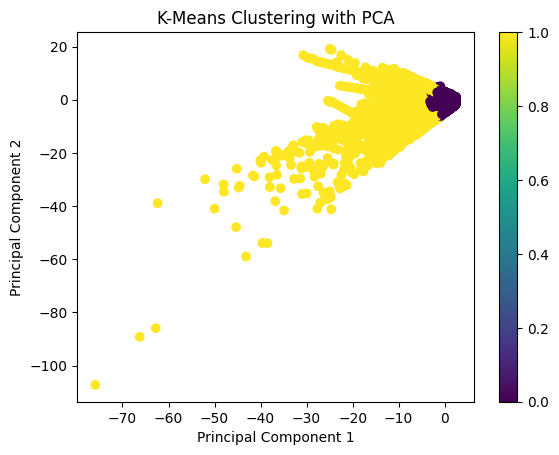

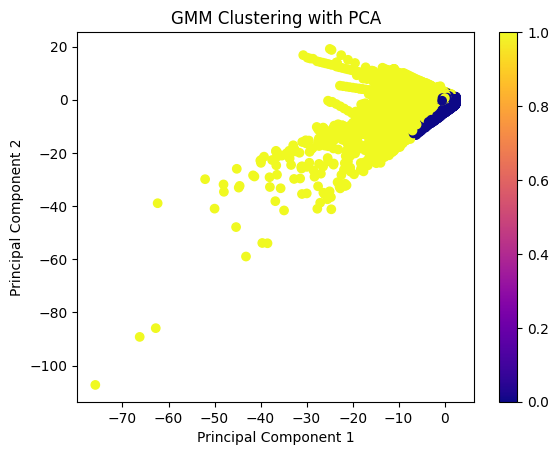

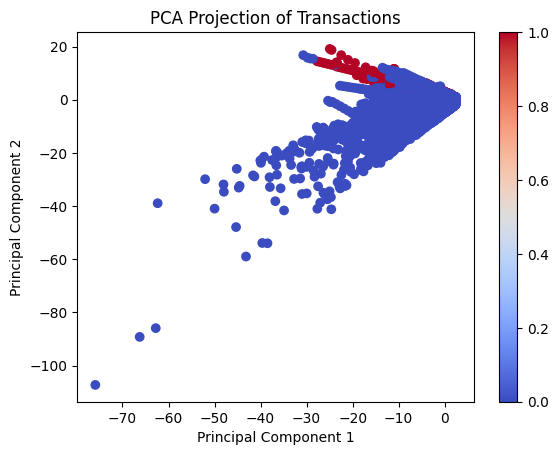

Explained variance ratio: [0.12088206 0.09654333]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9929 - loss: 0.0347 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9995 - loss: 0

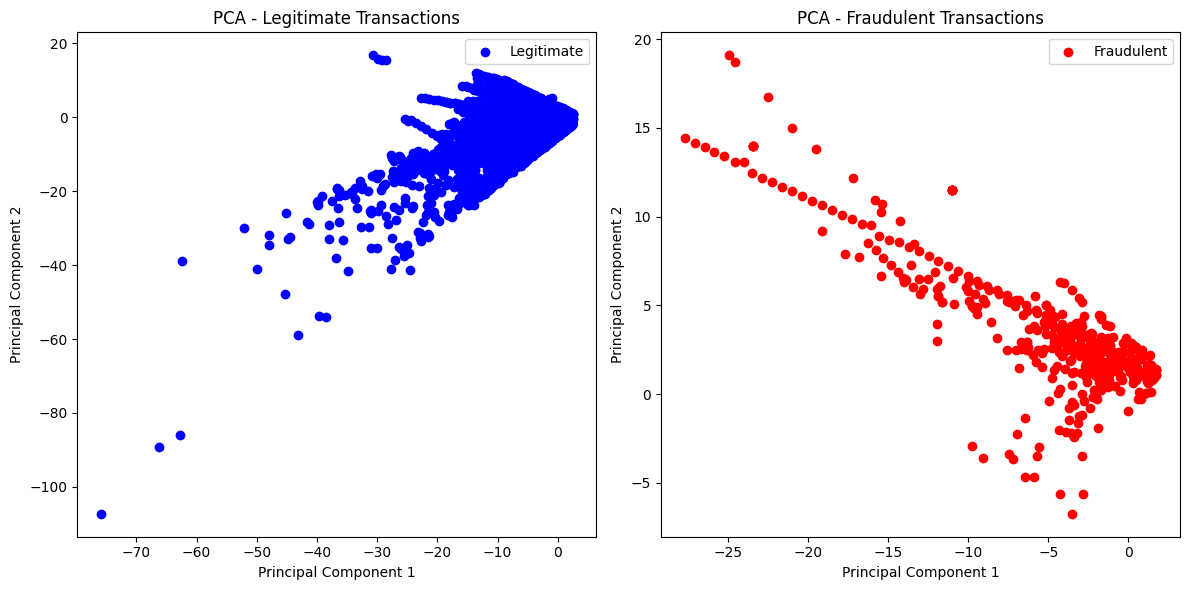

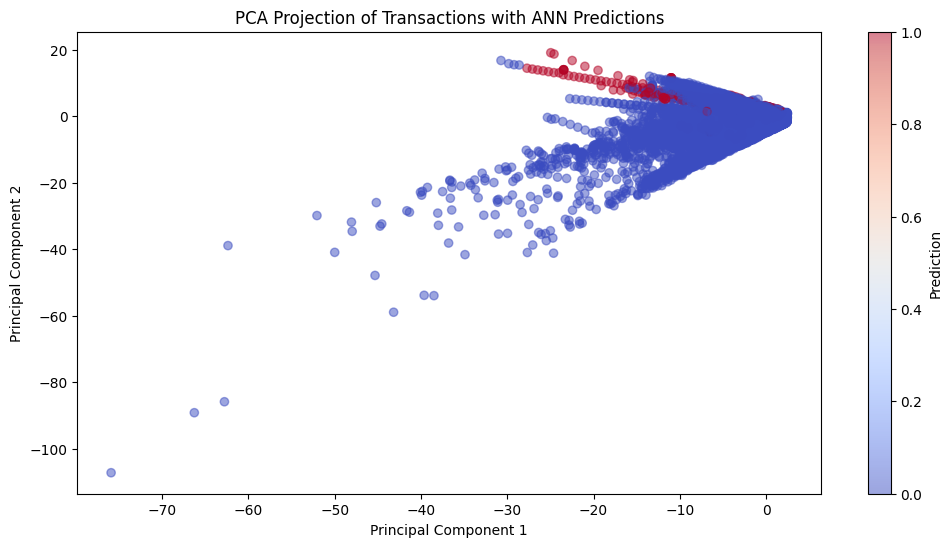

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess the dataset
data = pd.read_csv('creditcard.csv')

# Normalize the data (Amount and Time columns)
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data = data.drop(['Amount', 'Time'], axis=1)

# Prepare features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# -------------------------------------------------------
# 1. K-Means Clustering
# -------------------------------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# -------------------------------------------------------
# 2. Gaussian Mixture Models (GMM)
# -------------------------------------------------------
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Plot GMM results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='plasma')
plt.title('GMM Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# -------------------------------------------------------
# 3. Principal Component Analysis (PCA)
# -------------------------------------------------------
# Visualize PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('PCA Projection of Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Split the data for training and testing the ANN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------------------
# Define and Train the ANN Model
# -------------------------------------------------------
def create_ann_model(activation_function='relu'):
    model = Sequential([
        Dense(32, activation=activation_function, input_shape=(X_train.shape[1],)),
        Dense(16, activation=activation_function),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use ReLU activation function as it generally performs well
model = create_ann_model('relu')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------------------------------
# Visualize Fraudulent vs Legitimate Transactions
# -------------------------------------------------------
# Predict on the entire dataset
data['predicted'] = (model.predict(X) > 0.5).astype(int)

# Separate legitimate and fraudulent transactions
legitimate = data[data['predicted'] == 0]
fraudulent = data[data['predicted'] == 1]

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA with predictions
plt.figure(figsize=(12, 6))

# Plot Legitimate Transactions
plt.subplot(1, 2, 1)
plt.scatter(X_pca[legitimate.index, 0], X_pca[legitimate.index, 1], c='blue', label='Legitimate')
plt.title('PCA - Legitimate Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot Fraudulent Transactions
plt.subplot(1, 2, 2)
plt.scatter(X_pca[fraudulent.index, 0], X_pca[fraudulent.index, 1], c='red', label='Fraudulent')
plt.title('PCA - Fraudulent Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# Additional PCA visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['predicted'].values, cmap='coolwarm', alpha=0.5)
plt.title('PCA Projection of Transactions with ANN Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Prediction')
plt.show()
